In [136]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import requests
import json
import csv
import os
import re
from quant_preprocess import recode_ingredients
from quant_preprocess import query_and_preprocess_data
from quant_preprocess import query_and_reshape_long
from quant_preprocess import recode_long_data


df = query_and_preprocess_data()
df

ingredient,strdrink,absinthe,advocaat,aperitif,aquavit,baileys,beer,bitters,bourbon,brandy,...,sugard,sweet and sour,tequila,tonic water,vermouth,vodka,water,whiskey,wine,zima
0,1-900-FUK-MEUP,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,110 in the shade,0.0,0.0,0.000000,0.0,0.000000,0.914286,0.000,0.0,0.0,...,0.0,0.0,0.085714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,151 Florida Bushwacker,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,155 Belmont,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.0
4,24k nightmare,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Zizi Coin-coin,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
624,Zoksel,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
625,Zombie,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
626,Zorbatini,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.833333,0.0,0.0,0.0,0.0


In [117]:
# get just the feature matrix
X = df.drop("strdrink", axis=1)
X

ingredient,absinthe,advocaat,aperitif,aquavit,baileys,beer,bitters,bourbon,brandy,butter,...,sugard,sweet and sour,tequila,tonic water,vermouth,vodka,water,whiskey,wine,zima
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.914286,0.000,0.0,0.0,0.0,...,0.0,0.0,0.085714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
624,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
625,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
626,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.833333,0.0,0.0,0.0,0.0


In [118]:
# Import PCA
from sklearn.decomposition import PCA

In [119]:
# Instatiate PCA Instance
pca = PCA()

# Fit and transform the feature matrix with PCA. Each column is a principle component
X_pca = pca.fit_transform(X)

# Evaluate how many principle components we may want to actually keep
# Each value in this vector is the cumulative percent of the variance 
# in the original data that can be explained by the preceeding components
# and that one.
pca.explained_variance_ratio_.cumsum()

array([0.13958264, 0.23657309, 0.30618492, 0.37073525, 0.43282672,
       0.48774661, 0.53446114, 0.57744395, 0.61705969, 0.64699857,
       0.6697967 , 0.69228938, 0.71356246, 0.73284687, 0.75157723,
       0.76800573, 0.78361083, 0.79834875, 0.81191665, 0.82448096,
       0.83594145, 0.84659738, 0.85671578, 0.86632004, 0.87569034,
       0.88451266, 0.8925543 , 0.90006183, 0.90723439, 0.9141849 ,
       0.9207574 , 0.92717201, 0.93327826, 0.93917224, 0.94481161,
       0.9500599 , 0.95498213, 0.9593151 , 0.96358338, 0.96693762,
       0.97020852, 0.97313255, 0.97581533, 0.97831747, 0.98071258,
       0.98305701, 0.98529352, 0.9873641 , 0.98939389, 0.99139925,
       0.99320036, 0.9949276 , 0.99624729, 0.99708482, 0.99784592,
       0.99840758, 0.99883399, 0.99922335, 0.99943535, 0.99959182,
       0.99967367, 0.99975133, 0.99982133, 0.99988366, 0.99994373,
       0.99997904, 0.99999692, 0.9999999 , 1.        , 1.        ,
       1.        ])

In [59]:
# This is what the output looks like - we will select a number of
# these that explain enough of the data to try and cluster.
pd.DataFrame(X_pca)

# Once we select the number, we can re-run PCA with the n_components argument
# set to whatever that is, then move forward and run clustering

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.188339,0.281399,0.058014,-0.025111,0.122053,0.059396,0.008728,-0.093783,0.001109,0.027133,...,0.000528,-0.000152,0.000198,0.000287,-0.000183,0.000081,0.000136,0.000003,1.857507e-16,-3.259904e-19
1,-0.082329,-0.009566,-0.082999,0.094913,-0.042088,0.015643,-0.039669,-0.025633,0.140262,-0.139451,...,-0.000616,-0.001337,-0.007915,0.005923,0.000515,0.000088,-0.000074,-0.000001,7.879034e-16,-1.369324e-18
2,-0.150736,0.312110,-0.169265,-0.194001,0.093538,0.067183,-0.216143,0.110455,-0.180290,0.050770,...,0.000042,-0.000631,0.000351,-0.000091,0.000154,0.000157,0.000096,0.000006,-1.902746e-16,9.021995e-19
3,0.144674,-0.078391,-0.167563,0.071041,0.285028,0.291390,0.153432,0.314044,-0.038177,0.015916,...,0.000492,-0.002671,0.001014,0.000585,0.000118,0.000384,-0.000493,-0.000004,-5.975655e-16,-2.371183e-18
4,-0.075685,-0.040020,-0.135646,0.067904,0.082513,0.154219,-0.015256,0.113438,0.076723,-0.136533,...,0.000015,-0.001086,0.000701,0.000777,0.000316,0.000033,0.000049,-0.000007,-3.426816e-16,-4.961452e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0.074392,0.373484,0.168923,-0.049256,0.166966,-0.038530,-0.002047,-0.150514,-0.020568,0.065673,...,0.000643,0.000516,-0.000191,-0.000401,-0.000121,0.000037,0.000247,0.000004,-1.127268e-17,-1.205593e-19
624,-0.149071,-0.015192,-0.095616,0.421625,0.061476,-0.059892,-0.132864,-0.242363,-0.128323,0.093780,...,-0.000479,-0.000263,-0.003078,-0.002752,-0.000514,0.000053,0.000212,0.000018,-7.056511e-17,3.797114e-18
625,0.042317,-0.120158,-0.151326,-0.017983,0.198913,0.347411,0.114778,0.132756,-0.016822,-0.027505,...,0.004805,0.118691,-0.025112,-0.001744,-0.001381,-0.000486,-0.000079,0.000003,-3.946831e-18,4.528441e-19
626,-0.038574,0.063833,-0.125731,0.216510,-0.027241,-0.435623,0.400937,0.490829,-0.034513,-0.022103,...,0.000444,0.000198,0.001073,0.000316,0.000299,0.000090,-0.001941,-0.000027,2.456987e-18,-6.486771e-18


In [120]:
# One alternative to PCA might be truncated SVD, since our data is sort of
# sparse
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=25)
svd.fit_transform(X)

svd.explained_variance_ratio_.cumsum()

array([0.08115184, 0.17227272, 0.26541655, 0.33247643, 0.39611668,
       0.45248757, 0.50730208, 0.55386858, 0.59670445, 0.6311647 ,
       0.65577628, 0.67843126, 0.6999611 , 0.72097637, 0.7397705 ,
       0.75771587, 0.77387465, 0.78877062, 0.80247598, 0.81564493,
       0.82762463, 0.83889455, 0.84917788, 0.85878632, 0.86825575])

In [121]:
# Once we have done some dimensionality reduction, we can apply clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)

clusters_list = list(kmeans.fit_predict(X_pca))

In [150]:
# Then, with the clusters we can merge back on to our original drink
# names and look at the results
clusters = pd.DataFrame(list(zip(df["strdrink"],clusters_list)),
                   columns = ["strdrink", "cluster"]).sort_values("cluster")

# Probably want to actually merge the clusters back on to a more complete
# dataframe - having descriptive information about drink ingredients will
# help to see how our clustering is doing

descriptives = main_query(12)[["strdrink", "strglass","ingredients_list"]]
comparison = descriptives.merge(clusters, on = "strdrink")

# comparison.to_csv("../data/clusters_test.csv")

In [151]:
comparison

,strdrink,strglass,ingredients_list,cluster
0,Angelica Liqueur,Collins Glass,"angelica root, almond, allspice, cinnamon, ani...",1
1,Egg Nog #4,Punch bowl,"egg yolk, sugar, milk, light rum, bourbon, van...",1
2,Amaretto Liqueur,Collins Glass,"sugar, water, apricot, almond flavoring, grain...",1
3,Arizona Twister,Hurricane glass,"vodka, malibu rum, gold tequila, orange juice,...",1
4,3-Mile Long Island Iced Tea,Collins Glass,"gin, light rum, tequila, triple sec, vodka, co...",2
...,...,...,...,...
623,Rum Screwdriver,Highball glass,"light rum, orange juice",3
624,110 in the shade,Beer Glass,"lager, tequila",1
625,Amaretto Stinger,Cocktail glass,"amaretto, white creme de menthe",0
626,Godfather,Old-fashioned glass,"scotch, amaretto",0


In [99]:
import pandas as pd
import numpy as np
from database import engine
from ingredient_map import create_ingredient_map

In [66]:
# Functions
def query_data():
    """Query Database and return Data Frame with relevant columns"""
    query = """
    select
        strdrink,
        stringredient1,
        stringredient2,
        stringredient3,
        stringredient4,
        stringredient5,
        stringredient6,
        stringredient7,
        stringredient8,
        stringredient9,
        stringredient10,
        stringredient11,
        stringredient12,
        strmeasure1_clean,
        strmeasure2_clean,
        strmeasure3_clean,
        strmeasure4_clean,
        strmeasure5_clean,
        strmeasure6_clean,
        strmeasure7_clean,
        strmeasure8_clean,
        strmeasure9_clean,
        strmeasure10_clean,
        strmeasure11_clean,
        strmeasure12_clean
        
    from 
        all_cocktails
    ;
        """

    return pd.read_sql_query(query, engine)

In [88]:
query_data()

,strdrink,stringredient1,stringredient2,stringredient3,stringredient4,stringredient5,stringredient6,stringredient7,stringredient8,stringredient9,...,strmeasure3_clean,strmeasure4_clean,strmeasure5_clean,strmeasure6_clean,strmeasure7_clean,strmeasure8_clean,strmeasure9_clean,strmeasure10_clean,strmeasure11_clean,strmeasure12_clean
0,155 Belmont,Dark rum,Light rum,Vodka,Orange juice,None,None,None,None,None,...,1.00,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,1-900-FUK-MEUP,Absolut Kurant,Grand Marnier,Chambord raspberry liqueur,Midori melon liqueur,Malibu rum,Amaretto,Cranberry juice,Pineapple juice,None,...,0.25,0.25,0.25,0.25,0.5,0.25,0.0,0.0,0.0,0.0
2,110 in the shade,Lager,Tequila,None,None,None,None,None,None,None,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,151 Florida Bushwacker,Malibu rum,Light rum,151 proof rum,Dark Creme de Cacao,Cointreau,Milk,Coconut liqueur,Vanilla ice-cream,None,...,0.50,1.00,1.00,3.00,1.0,1.00,0.0,0.0,0.0,0.0
4,252,151 proof rum,Wild Turkey,None,None,None,None,None,None,None,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Zima Blaster,Zima,Chambord raspberry liqueur,None,None,None,None,None,None,None,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
624,Zizi Coin-coin,Cointreau,Lemon juice,Ice,Lemon,None,None,None,None,None,...,1.00,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
625,Zippy's Revenge,Amaretto,Rum,Kool-Aid,None,None,None,None,None,None,...,4.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
626,Zimadori Zinger,Midori melon liqueur,Zima,None,None,None,None,None,None,None,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [70]:
def cols_to_lower(df, columns):
    """Convert batch of columns to lowercase"""

    return df[columns].apply(lambda col: col.str.lower())

In [73]:
def get_cols_list(df, starts_with_criteria):
    """Get a list of columns based on criteria, returns list"""
    return [col for col in df.columns if col.startswith(starts_with_criteria)]

In [74]:
def shape_data_long(df, list_of_cols, col_start_string, col_end_string, new_name):
    """Reshapes ingredients or measurements in long format"""
    return (
        df[["strdrink"] + list_of_cols]
        .melt(id_vars="strdrink", value_vars=list_of_cols)
        .assign(
            ingred_num=lambda df_: df_["variable"]
            .str.replace(col_start_string, "")
            .str.replace(col_end_string, "")
            .astype("int")
        )
        .drop("variable", axis=1)
        .rename({"value": new_name}, axis=1)
    )

In [75]:
def merge_long(table_1, table_2):
    """Merges ingredients and measurements table and returns a long format dataframe"""
    return (
        table_1.merge(table_2, on=["strdrink", "ingred_num"])
        .sort_values(["strdrink", "ingred_num"])
        .drop("ingred_num", axis=1)
        .dropna()
        .reset_index(drop=True)
    )


In [76]:
def pivot_wide(df):
    """Takes long format dataframe and pivots wide so that each column is a unique ingredient and each row is a drink. Values are the amount included in each drink in ounces"""
    return (
        df.pivot_table(
            index="strdrink", columns="ingredient", values="amount", aggfunc=np.sum
        )
        .fillna(0)
        .reset_index()
    )


In [131]:
def recode_ingredients(df, dictionary):
    """Accepts the dataframe and a dictionary to recode the ingredients and applies"""
    return df.assign(ingredient=lambda df_: df_["ingredient"].replace(dictionary))

In [78]:
def calculate_row_sum(df):
    """Function takes in a dataframe, calculates the row sum of numeric columns, and returns a dataframe"""
    return df.assign(
        row_sum=lambda df_: df_.select_dtypes(include=np.number).sum(axis=1)
    )


In [92]:
calculate_row_sum(df)

ingredient,strdrink,absinthe,advocaat,aperitif,aquavit,baileys,beer,bitters,bourbon,brandy,...,sweet and sour,tequila,tonic water,vermouth,vodka,water,whiskey,wine,zima,row_sum
0,1-900-FUK-MEUP,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,110 in the shade,0.0,0.0,0.000000,0.0,0.000000,0.914286,0.000,0.0,0.0,...,0.0,0.085714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,151 Florida Bushwacker,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,155 Belmont,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,1.0
4,24k nightmare,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Zizi Coin-coin,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
624,Zoksel,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
625,Zombie,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
626,Zorbatini,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.833333,0.0,0.0,0.0,0.0,1.0


In [79]:
def calculate_row_prop(df, prop_cols):
    """Function takes in dataframe, calculates proportions for columns, returns dataframe"""

    return df[prop_cols].apply(lambda col: col / df["row_sum"])

In [108]:
def query_and_reshape_long():
    """Function queries the database and reshapes the data in long format with three columns - drink, ingredient, and amount in ounces"""
    df = query_data()
    ingred_cols = get_cols_list(df, "stringredient")
    measure_cols = get_cols_list(df, "strmeasure")

    df[ingred_cols] = cols_to_lower(df, ingred_cols)

    ingredient_long = shape_data_long(
        df, ingred_cols, "stringredient", "", "ingredient"
    )

    measure_long = shape_data_long(df, measure_cols, "strmeasure", "_clean", "amount")

    return merge_long(ingredient_long, measure_long)

In [94]:
query_and_reshape_long()

,strdrink,ingredient,amount
0,1-900-FUK-MEUP,absolut kurant,0.50
1,1-900-FUK-MEUP,grand marnier,0.25
2,1-900-FUK-MEUP,chambord raspberry liqueur,0.25
3,1-900-FUK-MEUP,midori melon liqueur,0.25
4,1-900-FUK-MEUP,malibu rum,0.25
...,...,...,...
2517,Zorbatini,vodka,1.25
2518,Zorbatini,ouzo,0.25
2519,Zorro,sambuca,2.00
2520,Zorro,baileys irish cream,2.00


In [133]:
def recode_long_data(df):
    """Function takes the long format data and recodes the ingredients"""

    ingredient_dict = create_ingredient_map()
    return recode_ingredients(df, ingredient_dict)

In [134]:
def query_and_preprocess_data():
    """Function performs full preprocessing: Queries the database, recodes incredients, reshapes in wide format with a column for each ingredient and a row for each drink. Values are the proportion of that drink that is made up of that ingredient (rows sum to 1)"""

    df = query_and_reshape_long()

    recoded_long = recode_long_data(df)

    combined_wide = pivot_wide(recoded_long)

    w_rowsum = calculate_row_sum(combined_wide)

    prop_cols = get_prop_cols(w_rowsum)
    w_rowsum[prop_cols] = calculate_row_prop(w_rowsum, prop_cols)

    return w_rowsum.drop("row_sum", axis=1)

In [137]:
query_and_preprocess_data()

ingredient,strdrink,absinthe,advocaat,aperitif,aquavit,baileys,beer,bitters,bourbon,brandy,...,sugard,sweet and sour,tequila,tonic water,vermouth,vodka,water,whiskey,wine,zima
0,1-900-FUK-MEUP,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,110 in the shade,0.0,0.0,0.000000,0.0,0.000000,0.914286,0.000,0.0,0.0,...,0.0,0.0,0.085714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,151 Florida Bushwacker,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,155 Belmont,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.0
4,24k nightmare,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Zizi Coin-coin,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
624,Zoksel,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
625,Zombie,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
626,Zorbatini,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.833333,0.0,0.0,0.0,0.0


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [168]:
dataset = make_blobs(n_samples = 600,
                     n_features = 3,
                     centers = 3,
                    )
                    

In [157]:
points = dataset[0]

In [161]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

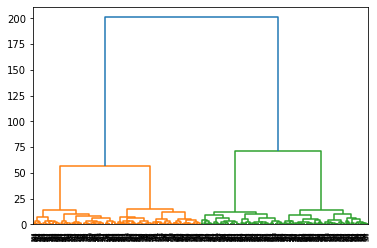

In [169]:
#Creating a dendrogram
dendrogram = hierarchy.dendrogram(hierarchy.linkage(points, method = 'ward'))